In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt
import lasagne
import imp
import shallow_mnist
from collections import OrderedDict
import theano
import theano.tensor as T
from lasagne import utils

%matplotlib inline

In [2]:
(1-0.9)/np.sqrt(1-0.999)

3.1622776601683773

In [3]:
def make_seed(n):
    np.random.seed(n)
    lasagne.random.set_rng(np.random)

In [4]:
%%time
make_seed(17)
adam_s1 = shallow_mnist.run_method(shallow_mnist.adam_update, num_epochs=50, alpha=1e-3, beta1=0.9, beta2=0.999)

2
The network has 99710 params
CPU times: user 6min 29s, sys: 8min 2s, total: 14min 31s
Wall time: 2min 26s


In [5]:
%%time
make_seed(17)
adam_s2 = shallow_mnist.run_method(shallow_mnist.adam_update, num_epochs=50, alpha=1e-3, beta1=0.9, beta2=0.999)

2
The network has 99710 params
CPU times: user 6min 33s, sys: 6min 17s, total: 12min 51s
Wall time: 1min 41s


In [6]:
%%time
make_seed(17)
adam_s3 = shallow_mnist.run_method(shallow_mnist.adam_update, num_epochs=50, alpha=1e-3, epsilon = 1e-3)

2
The network has 99710 params
CPU times: user 6min 43s, sys: 6min 10s, total: 12min 53s
Wall time: 1min 40s


In [7]:
%%time
make_seed(17)
bn_adam_s1 = shallow_mnist.run_method(shallow_mnist.adam_update, num_epochs=50, alpha=1e-3, BN=True, beta1=0.9, beta2=0.999)

2
The network has 100614 params
CPU times: user 10min 2s, sys: 16min 4s, total: 26min 6s
Wall time: 3min 28s


In [8]:
%%time
make_seed(17)
bn_adam_s2 = shallow_mnist.run_method(shallow_mnist.adam_update, num_epochs=50, alpha=1e-4*3, BN=True, beta1=0.9, beta2=0.999)

2
The network has 100614 params
CPU times: user 10min 4s, sys: 16min 20s, total: 26min 24s
Wall time: 3min 27s


In [9]:
%%time
make_seed(17)
bn_adam_s3 = shallow_mnist.run_method(shallow_mnist.adam_update, num_epochs=50, alpha=1e-3, BN=True,epsilon = 1e-3*4)

2
The network has 100614 params
CPU times: user 10min 59s, sys: 17min 49s, total: 28min 49s
Wall time: 3min 46s


In [12]:
%%time
make_seed(17)
bn_adam_s4 = shallow_mnist.run_method(shallow_mnist.adam_update, num_epochs=50, alpha=1e-3, beta1=0.9, beta2=0.99, BN=True)

2
The network has 100614 params
CPU times: user 9min 52s, sys: 17min 1s, total: 26min 53s
Wall time: 3min 38s


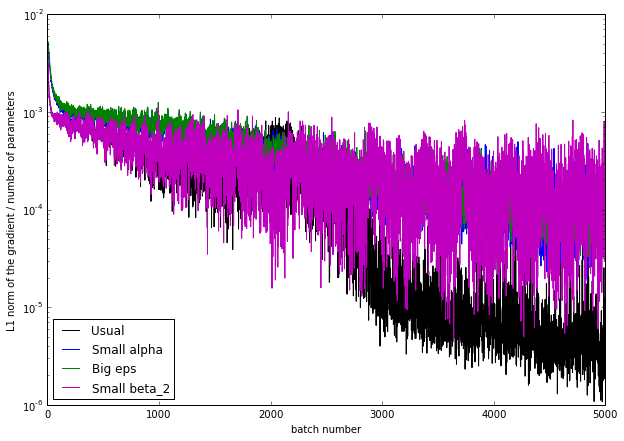

In [13]:
plt.figure(figsize=(10,7))
#plt.plot(adam_s1['s_min'],c='b')
#plt.plot(adam_s1['s_max'],c='r')
#plt.plot(adam_s1['s_mean'],c='r')
#plt.plot(adam_s2['s_min'],c='g')
#plt.plot(adam_s2['s_max'],c='g')
#plt.plot(adam_s2['s_mean'],c='g')
#plt.plot(adam_s3['s_min'],c='b')
#plt.plot(adam_s3['s_max'],c='b')
#plt.plot(adam_s3['s_mean'],c='b')
#plt.plot(bn_adam_s1['s_min'],c='m')
#plt.plot(bn_adam_s1['s_max'],c='m')
plt.plot(bn_adam_s1['s_mean'],c='k')
#plt.plot(bn_adam_s2['s_min'],c='k')
#plt.plot(bn_adam_s2['s_max'],c='k')
plt.plot(bn_adam_s2['s_mean'],c='b')
#plt.plot(bn_adam_s3['s_min'],c='y')
#plt.plot(bn_adam_s3['s_max'],c='y')
plt.plot(bn_adam_s3['s_mean'],c='g')
plt.plot(bn_adam_s4['s_mean'],c='m')
plt.yscale('log')
plt.xlabel('batch number')
plt.ylabel('L1 norm of the gradient / number of parameters')
#plt.legend(['Adam','Adam + BN'])
#plt.savefig('1.png')
plt.legend(['Usual','Small alpha','Big eps','Small beta_2'],loc = 3)
plt.savefig('4.png')

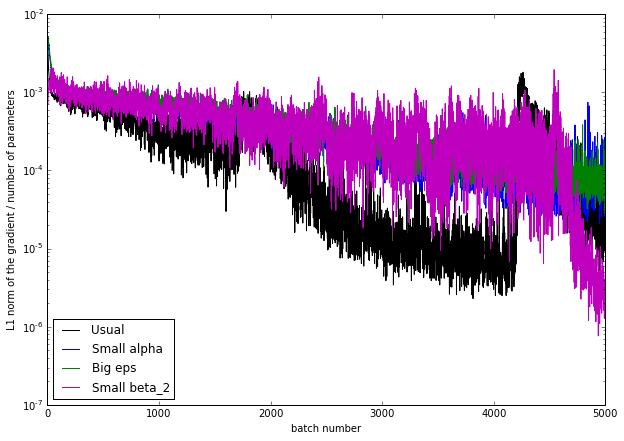

In [390]:
plt.figure(figsize=(10,7))
#plt.plot(adam_s1['s_min'],c='b')
#plt.plot(adam_s1['s_max'],c='r')
#plt.plot(adam_s1['s_mean'],c='r')
#plt.plot(adam_s2['s_min'],c='g')
#plt.plot(adam_s2['s_max'],c='g')
#plt.plot(adam_s2['s_mean'],c='g')
#plt.plot(adam_s3['s_min'],c='b')
#plt.plot(adam_s3['s_max'],c='b')
#plt.plot(adam_s3['s_mean'],c='b')
#plt.plot(bn_adam_s1['s_min'],c='m')
#plt.plot(bn_adam_s1['s_max'],c='m')
plt.plot(bn_adam_s1['s_mean'],c='k')
#plt.plot(bn_adam_s2['s_min'],c='k')
#plt.plot(bn_adam_s2['s_max'],c='k')
plt.plot(bn_adam_s2['s_mean'],c='b')
#plt.plot(bn_adam_s3['s_min'],c='y')
#plt.plot(bn_adam_s3['s_max'],c='y')
plt.plot(bn_adam_s3['s_mean'],c='g')
plt.plot(bn_adam_s4['s_mean'],c='m')
plt.yscale('log')
plt.xlabel('batch number')
plt.ylabel('L1 norm of the gradient / number of parameters')
#plt.legend(['Adam','Adam + BN'])
#plt.savefig('1.png')
plt.legend(['Usual','Small alpha','Big eps','Small beta_2'],loc = 3)
plt.savefig('4.png')

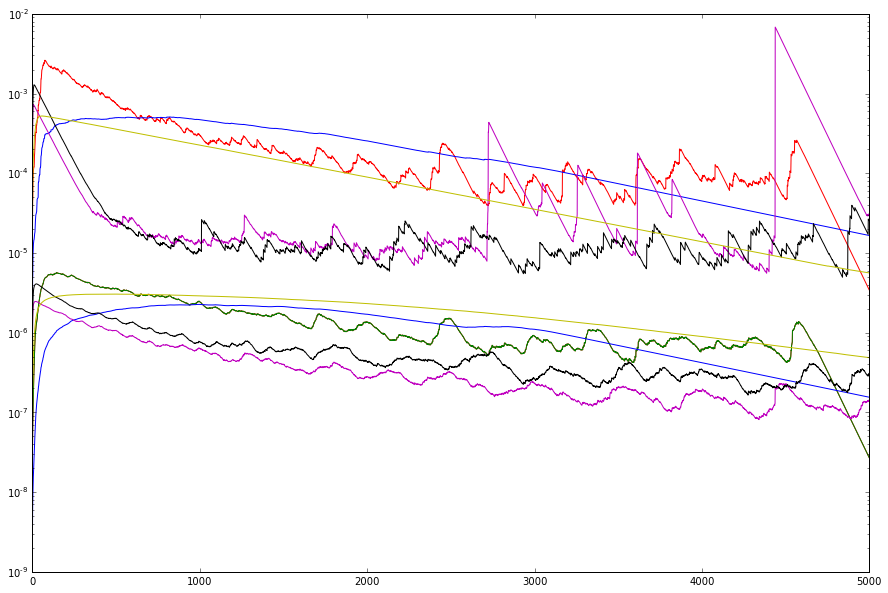

In [292]:
plt.figure(figsize=(15,10))
#plt.plot(adam_s1['v_min'],c='r')
plt.plot(adam_s1['v_max'],c='r')
plt.plot(adam_s1['v_mean'],c='r')
#plt.plot(adam_s2['v_min'],c='g')
#plt.plot(adam_s2['v_max'],c='g')
plt.plot(adam_s2['v_mean'],c='g')
#plt.plot(adam_s3['v_min'],c='b')
plt.plot(adam_s3['v_max'],c='b')
plt.plot(adam_s3['v_mean'],c='b')
#plt.plot(bn_adam_s1['v_min'],c='m')
plt.plot(bn_adam_s1['v_max'],c='m')
plt.plot(bn_adam_s1['v_mean'],c='m')
#plt.plot(bn_adam_s2['v_min'],c='k')
plt.plot(bn_adam_s2['v_max'],c='k')
plt.plot(bn_adam_s2['v_mean'],c='k')
#plt.plot(bn_adam_s3['v_min'],c='y')
plt.plot(bn_adam_s3['v_max'],c='y')
plt.plot(bn_adam_s3['v_mean'],c='y')
plt.yscale('log')

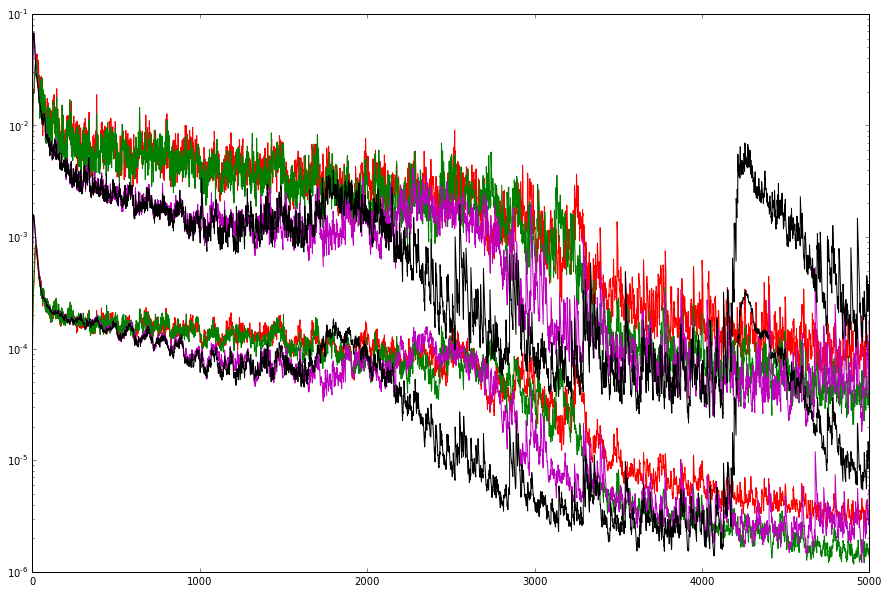

In [314]:
plt.figure(figsize=(15,10))
plt.plot(adam_s1['m_max'],c='r')
plt.plot(adam_s1['m_mean'],c='r')
plt.plot(adam_s2['m_max'],c='g')
plt.plot(adam_s2['m_mean'],c='g')
#plt.plot(adam_s3['m_max'],c='b')
#plt.plot(adam_s3['m_mean'],c='b')
plt.plot(bn_adam_s1['m_max'],c='m')
plt.plot(bn_adam_s1['m_mean'],c='m')
plt.plot(bn_adam_s2['m_max'],c='k')
plt.plot(bn_adam_s2['m_mean'],c='k')
#plt.plot(bn_adam_s3['m_max'],c='y')
#plt.plot(bn_adam_s3['m_mean'],c='y')
plt.yscale('log')

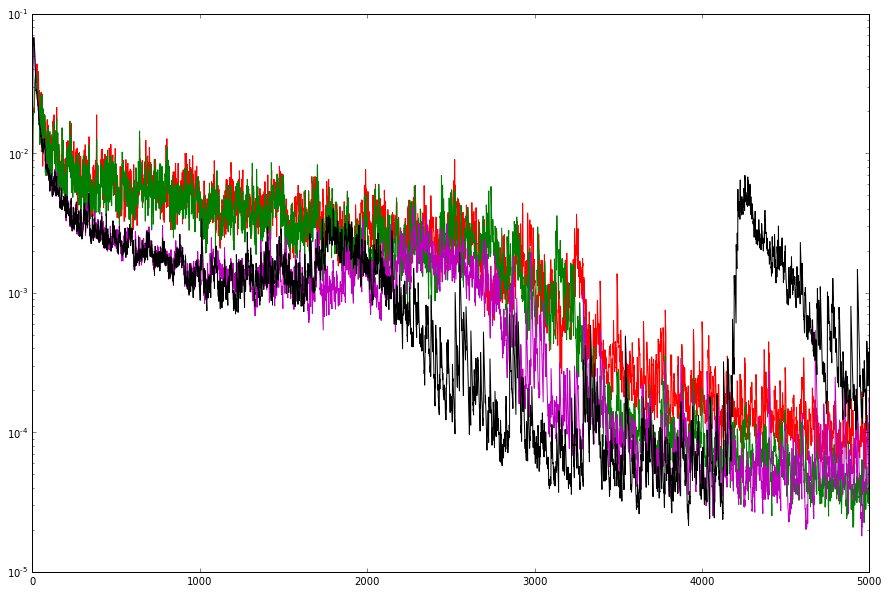

In [315]:
plt.figure(figsize=(15,10))
plt.plot(adam_s1['m_max'],c='r')
plt.plot(adam_s2['m_max'],c='g')
#plt.plot(adam_s3['m_max'],c='b')
plt.plot(bn_adam_s1['m_max'],c='m')
plt.plot(bn_adam_s2['m_max'],c='k')
#plt.plot(bn_adam_s3['m_max'],c='y')
plt.yscale('log')

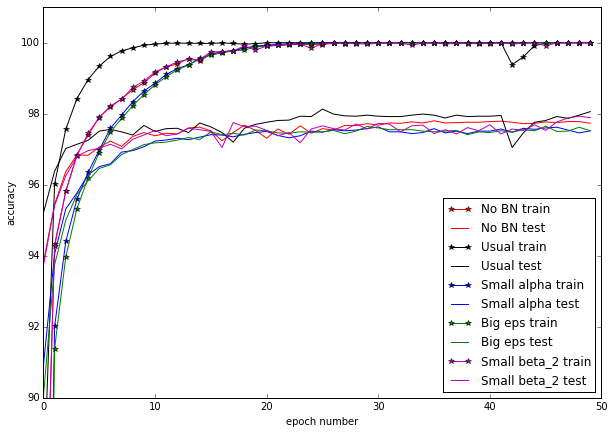

In [391]:
plt.figure(figsize=(10,7))
#plt.plot(adam_s1['v_min'],c='b')
#plt.plot(adam_s1['v_max'],c='b')
#plt.plot(adam_s1['v_mean'],c='b')
plt.plot(adam_s1['train_acc'],c='r',marker = '*')
plt.plot(adam_s1['val_acc'],c='r')
#plt.plot(adam_s2['train_acc'],c='g')
#plt.plot(adam_s2['val_acc'],c='g')
#plt.plot(adam_s3['train_acc'],c='b')
#plt.plot(adam_s3['val_acc'],c='b')
plt.plot(bn_adam_s1['train_acc'],c='k',marker = '*')
plt.plot(bn_adam_s1['val_acc'],c='k')
plt.plot(bn_adam_s2['train_acc'],c='b',marker = '*')
plt.plot(bn_adam_s2['val_acc'],c='b')
plt.plot(bn_adam_s3['train_acc'],c='g',marker = '*')
plt.plot(bn_adam_s3['val_acc'],c='g')
plt.plot(bn_adam_s4['train_acc'],c='m',marker = '*')
plt.plot(bn_adam_s4['val_acc'],c='m')
plt.ylim(90,101)
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.legend(['No BN train','No BN test', 'Usual train','Usual test','Small alpha train','Small alpha test','Big eps train','Big eps test','Small beta_2 train','Small beta_2 test'],loc = 4)
plt.savefig('3.png')

In [99]:
print adam_s1['s_mean'][:10]
print adam_s1['m_mean'][:10]

[ 0.00072934  0.00059858  0.00053368  0.0005011   0.00046934  0.00045555
  0.00044832  0.00044503  0.00044431  0.00044591]
[  8.71456228e-05   1.43795561e-04   1.85015285e-04   2.22677453e-04
   2.54154540e-04   2.93841241e-04   3.31289643e-04   3.75897728e-04
   4.26690933e-04   4.74928777e-04]


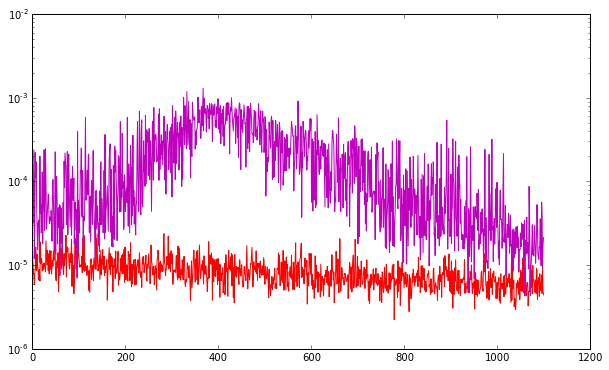

In [226]:
plt.figure(figsize=(10,6))
plt.plot(adam_s1['s_mean'][3900:],c='r')
#plt.plot(adam_s2['s_mean'][3900:],c='g')
#plt.plot(adam_s3['s_mean'][3900:],c='b')
plt.plot(bn_adam_s1['s_mean'][3900:],c='m')
#plt.plot(bn_adam_s2['s_mean'][3900:],c='k')
#plt.plot(bn_adam_s3['s_mean'][3900:],c='y')
plt.yscale('log')

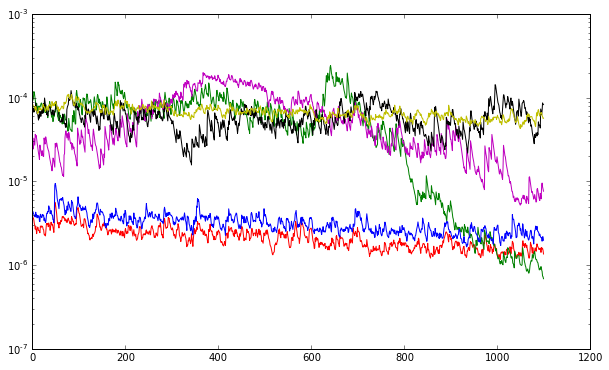

In [232]:
plt.figure(figsize=(10,6))
plt.plot(adam_s1['m_mean'][3900:],c='r')
plt.plot(adam_s2['m_mean'][3900:],c='g')
plt.plot(adam_s3['m_mean'][3900:],c='b')
plt.plot(bn_adam_s1['m_mean'][3900:],c='m')
plt.plot(bn_adam_s2['m_mean'][3900:],c='k')
plt.plot(bn_adam_s3['m_mean'][3900:],c='y')
plt.yscale('log')

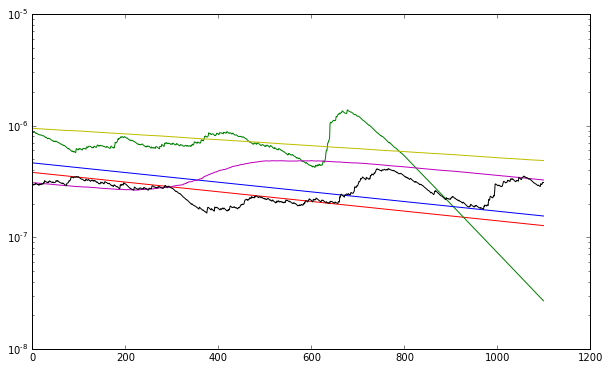

In [233]:
plt.figure(figsize=(10,6))
plt.plot(adam_s1['v_mean'][3900:],c='r')
plt.plot(adam_s2['v_mean'][3900:],c='g')
plt.plot(adam_s3['v_mean'][3900:],c='b')
plt.plot(bn_adam_s1['v_mean'][3900:],c='m')
plt.plot(bn_adam_s2['v_mean'][3900:],c='k')
plt.plot(bn_adam_s3['v_mean'][3900:],c='y')
plt.yscale('log')

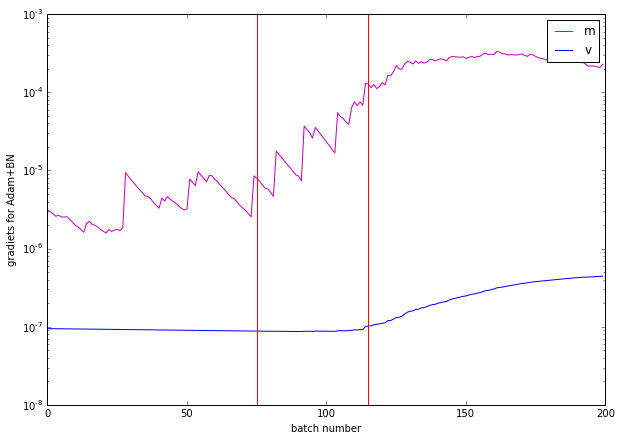

In [387]:
plt.figure(figsize=(10,7))
start = 4100
stop = 4300
#start = 0
#stop = 1000
plt.plot(bn_adam_s1['m_mean'][start:stop],c='m')
#plt.plot(bn_adam_s1['s_mean'][start:stop],c='k')
plt.plot(bn_adam_s1['v_mean'][start:stop],c='b')
plt.plot([75,75],[1e-8,1e-3],'r')
plt.plot([115,115],[1e-8,1e-3],'r')
plt.yscale('log')
plt.xlabel('batch number')
plt.ylabel('gradiets for Adam+BN')
plt.legend(['m','v'])
plt.savefig('5.png')

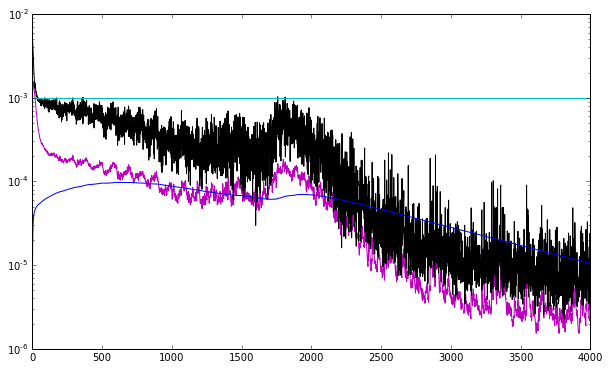

In [320]:
plt.figure(figsize=(10,6))
start = 0
stop = 4000
#start = 0
#stop = 1000
plt.plot(bn_adam_s2['m_mean'][start:stop],c='m')
plt.plot(bn_adam_s2['s_mean'][start:stop],c='k')
plt.plot(bn_adam_s2['v_mean'][start:stop]*100,c='b')
plt.plot([0,stop-start],[1e-3,1e-3])
plt.ylim(1e-6,1e-2)
plt.yscale('log')

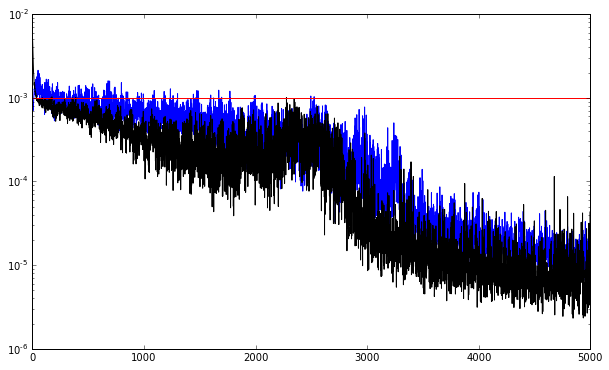

In [324]:
plt.figure(figsize=(10,6))
start = 0
stop = 5000
#start = 0
#stop = 1000

plt.plot(adam_s1['s_mean'][start:stop],c='b')
plt.plot(bn_adam_s1['s_mean'][start:stop],c='k')
plt.plot([0,stop-start],[1e-3,1e-3])
plt.ylim(1e-6,1e-2)
plt.yscale('log')

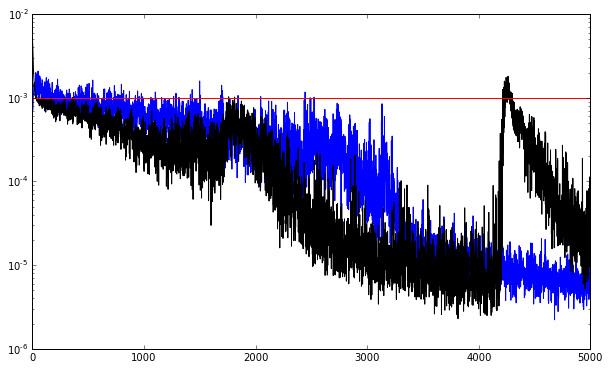

In [325]:
plt.figure(figsize=(10,6))
start = 0
stop = 5000
#start = 0
#stop = 1000

plt.plot(adam_s2['s_mean'][start:stop],c='b')
plt.plot(bn_adam_s2['s_mean'][start:stop],c='k')
plt.plot([0,stop-start],[1e-3,1e-3])
plt.ylim(1e-6,1e-2)
plt.yscale('log')

In [218]:
print adam_s1['s_mean'][1300:1400].mean(), bn_adam_s1['s_mean'][1300:1400].mean()

0.000519291193791 0.000256536145384


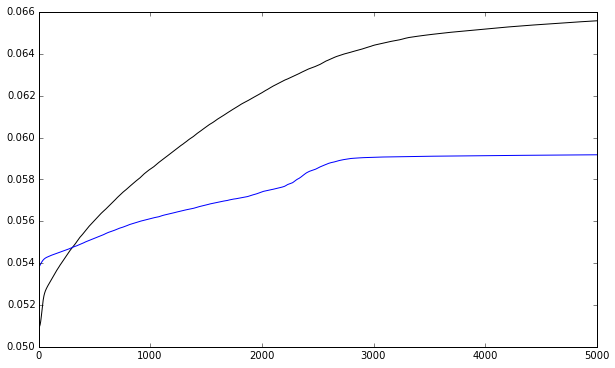

In [327]:
plt.figure(figsize=(10,6))
start = 0
stop = 5000
#start = 0
#stop = 1000
plt.plot(adam_s1['w_mean'][start:stop],c='k')
plt.plot(bn_adam_s1['w_mean'][start:stop],c='b')

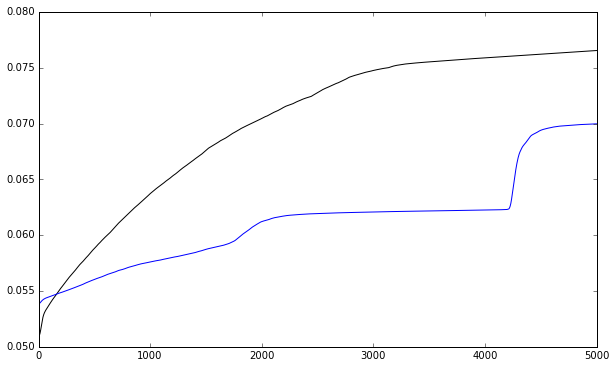

In [328]:
plt.figure(figsize=(10,6))
start = 0
stop = 5000
#start = 0
#stop = 1000
plt.plot(adam_s2['w_mean'][start:stop],c='k')
plt.plot(bn_adam_s2['w_mean'][start:stop],c='b')

In [221]:
print adam_s1['w_mean'][1400], bn_adam_s1['w_mean'][1400]

0.0668249887565 0.0584371916386


In [222]:
print bn_adam_s1['w_mean'][1400]/adam_s1['w_mean'][1400]

0.87448112938


In [204]:
adam_s1['w_mean'][:20]*10000

array([ 509.5201377,  509.5201377,  509.5201377,  509.5201377,
        509.5201377,  509.5201377,  509.5201377,  509.5201377,
        509.5201377,  509.5201377,  509.5201377,  509.5201377,
        509.5201377,  509.5201377,  509.5201377,  509.5201377,
        509.5201377,  509.5201377,  509.5201377,  509.5201377])

In [190]:
print adam_s1['v_mean'][1500]
print bn_adam_s1['v_mean'][1500]

1.92579911281e-06
6.76670085381e-07


In [13]:
bn_adam_s1['v_max'][40:]

array([  2.75022376e-06,   2.49461618e-06,   1.06015023e-05,
         1.06668031e-05,   1.03018783e-05,   9.67252254e-06,
         8.81332926e-06,   8.04615229e-06,   7.28894292e-06,
         6.60012438e-06], dtype=float32)

In [14]:
bn_adam_s1['v_min'][40:]

array([  1.39158780e-21,   1.26329463e-21,   6.15383036e-21,
         9.01497378e-21,   1.09870507e-20,   1.05651846e-20,
         1.03320925e-20,   1.01793969e-20,   9.37897607e-21,
         8.65203375e-21], dtype=float32)

In [12]:
bn_adam_s1['m_max'][40:]

array([  5.85167036e-05,   9.62660357e-04,   4.00843099e-03,
         2.03517987e-03,   1.50254404e-03,   1.23623188e-03,
         7.49374332e-04,   3.78560886e-04,   2.77950719e-04,
         2.62529938e-04], dtype=float32)

In [15]:
bn_adam_s1['m_min'][40:]

array([ -5.28389901e-05,  -8.58951127e-04,  -4.34608432e-03,
        -1.68661017e-03,  -1.40773878e-03,  -1.46202568e-03,
        -4.75841458e-04,  -3.72882583e-04,  -2.10148166e-04,
        -2.28426827e-04], dtype=float32)

In [17]:
bn_adam_s1['train_err'][40:]

array([ 0.00012238,  0.00022036,  0.05279633,  0.02440237,  0.00914377,
        0.00399647,  0.0016817 ,  0.00107675,  0.00065961,  0.00052123])

In [20]:
bn_adam_s1['val_err'][40:]

array([ 0.0974095 ,  0.10482789,  0.11401591,  0.09323972,  0.09262749,
        0.08984047,  0.08641629,  0.08948327,  0.09027755,  0.08750452])

In [7]:
adam_s1['v_min']

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [1]:
plt.plot(adam_s1['train_err'])
plt.plot(adam_s1['val_err'])

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


NameError: name 'plt' is not defined

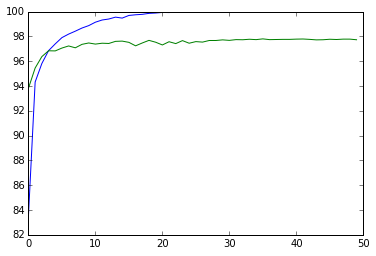

In [12]:
plt.plot(adam_s1['train_acc'])
plt.plot(adam_s1['val_acc'])

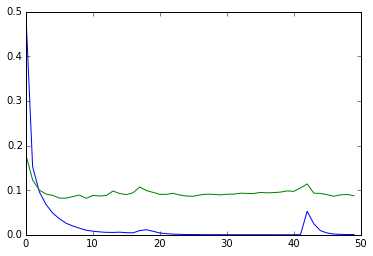

In [11]:
plt.plot(bn_adam_s1['train_err'])
plt.plot(bn_adam_s1['val_err'])

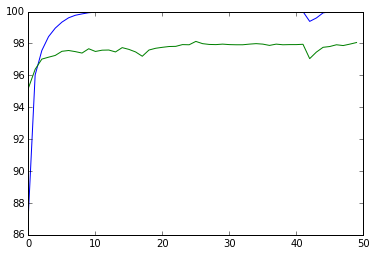

In [9]:
plt.plot(bn_adam_s1['train_acc'])
plt.plot(bn_adam_s1['val_acc'])

In [12]:
import pickle
with open('adam_s1', 'wb') as f:
    pickle.dump(adam_s1, f)
    pickle.dump(bn_adam_s1, f)

In [15]:
%%time
make_seed(100)
adam_s100 = shallow_mnist.run_method(shallow_mnist.adam_update, num_epochs=50, alpha=1e-3)

2
CPU times: user 5min 56s, sys: 7min 4s, total: 13min
Wall time: 3min 9s


In [16]:
%%time
make_seed(100)
bn_adam_s100 = shallow_mnist.run_method(shallow_mnist.adam_update, num_epochs=50, alpha=1e-3, BN=True)

2
CPU times: user 9min 50s, sys: 16min 46s, total: 26min 37s
Wall time: 6min 20s


In [17]:
import pickle
with open('adam_s100', 'wb') as f:
    pickle.dump(adam_s100, f)
    pickle.dump(bn_adam_s100, f)

In [18]:
%%time
make_seed(10)
adam_s10 = shallow_mnist.run_method(shallow_mnist.adam_update, num_epochs=50, alpha=1e-3)

2
CPU times: user 6min 35s, sys: 8min 7s, total: 14min 42s
Wall time: 3min 26s


In [19]:
%%time
make_seed(10)
bn_adam_s10 = shallow_mnist.run_method(shallow_mnist.adam_update, num_epochs=50, alpha=1e-3, BN=True)

2
CPU times: user 9min, sys: 16min 10s, total: 25min 10s
Wall time: 6min 1s


In [20]:
import pickle
with open('adam_s10', 'wb') as f:
    pickle.dump(adam_s10, f)
    pickle.dump(bn_adam_s10, f)

In [21]:
%%time
make_seed(42)
adam_s42 = shallow_mnist.run_method(shallow_mnist.adam_update, num_epochs=50, alpha=1e-3)

2
CPU times: user 5min 57s, sys: 7min 35s, total: 13min 32s
Wall time: 3min 5s


In [22]:
%%time
make_seed(42)
bn_adam_s42 = shallow_mnist.run_method(shallow_mnist.adam_update, num_epochs=50, alpha=1e-3, BN=True)

2
CPU times: user 9min 15s, sys: 17min 5s, total: 26min 20s
Wall time: 6min 19s


In [23]:
import pickle
with open('adam_s42', 'wb') as f:
    pickle.dump(adam_s42, f)
    pickle.dump(bn_adam_s42, f)

In [37]:
plt.plot(adam_s42['train_acc'], 'b--')
plt.plot(adam_s42['val_acc'], 'b')
plt.plot(bn_adam_s42['train_acc'], 'r--')
plt.plot(bn_adam_s42['val_acc'], 'r')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.xlim(xmax=49)
plt.legend(['Adam train', 'Adam validation', 'BN Adam train', 'BN Adam validation'], loc=0, fontsize=12)
plt.title('Adam, epsilon=1e-4 out of sqrt')
plt.ylim(ymax=100.5)
plt.show()